<a href="https://colab.research.google.com/github/urazalinuraliev/Myi-Vivivo-project/blob/main/my_vivino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def load_dataset():
    return pd.read_csv("/content/vivino_top_ten.csv")
    
data = load_dataset()

In [ ]:
data.isnull().sum()

Winery            0
Year             15
Wine_ID           0
Wine              0
Rating            0
Reviews           0
Price             0
Region            0
Primary_Grape     0
Natural           0
Country           0
Style             0
Country_Code      0
dtype: int64

In [ ]:
def clean_dataset(data):
    data['Year'] = data['Year'].str.replace('N.V.', '2021')
    data['Year'] = data['Year'].fillna(2021)
    data.drop(columns='Wine_ID', inplace=True)
    data.drop(columns='Country_Code', inplace=True)
    data['Year'] = data['Year'].map(lambda x: int(x))

clean_dataset(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
data.isnull().sum()

Winery           0
Year             0
Wine             0
Rating           0
Reviews          0
Price            0
Region           0
Primary_Grape    0
Natural          0
Country          0
Style            0
dtype: int64

Describe data

In [ ]:
def summer_data(data):   
    print(f"Shape \n{data.shape}\n")
    print(f"Info \n{data.info()}\n")
    print(f"Describe of data \n{data.describe()}\n")
    print(f"Head of 10 rows {data.head()}")
summer_data(data)

Shape 
(12205, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Winery         12205 non-null  object 
 1   Year           12205 non-null  int64  
 2   Wine           12205 non-null  object 
 3   Rating         12205 non-null  float64
 4   Reviews        12205 non-null  int64  
 5   Price          12205 non-null  float64
 6   Region         12205 non-null  object 
 7   Primary_Grape  12205 non-null  object 
 8   Natural        12205 non-null  bool   
 9   Country        12205 non-null  object 
 10  Style          12205 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 965.6+ KB
Info 
None

Describe of data 
               Year        Rating        Reviews         Price
count  12205.000000  12205.000000   12205.000000  12205.000000
mean    2016.788693      3.919992     498.468005     42.610824
std    

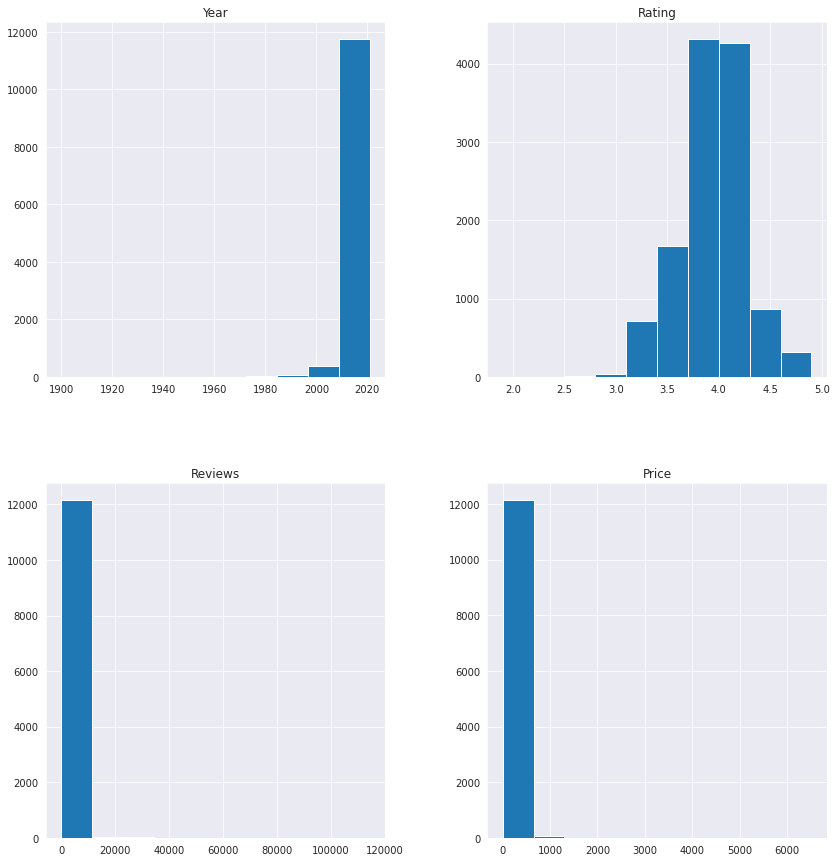

In [ ]:
def print_histograms(dataset):
  dataset.hist(figsize=(14,15))
print_histograms(data)

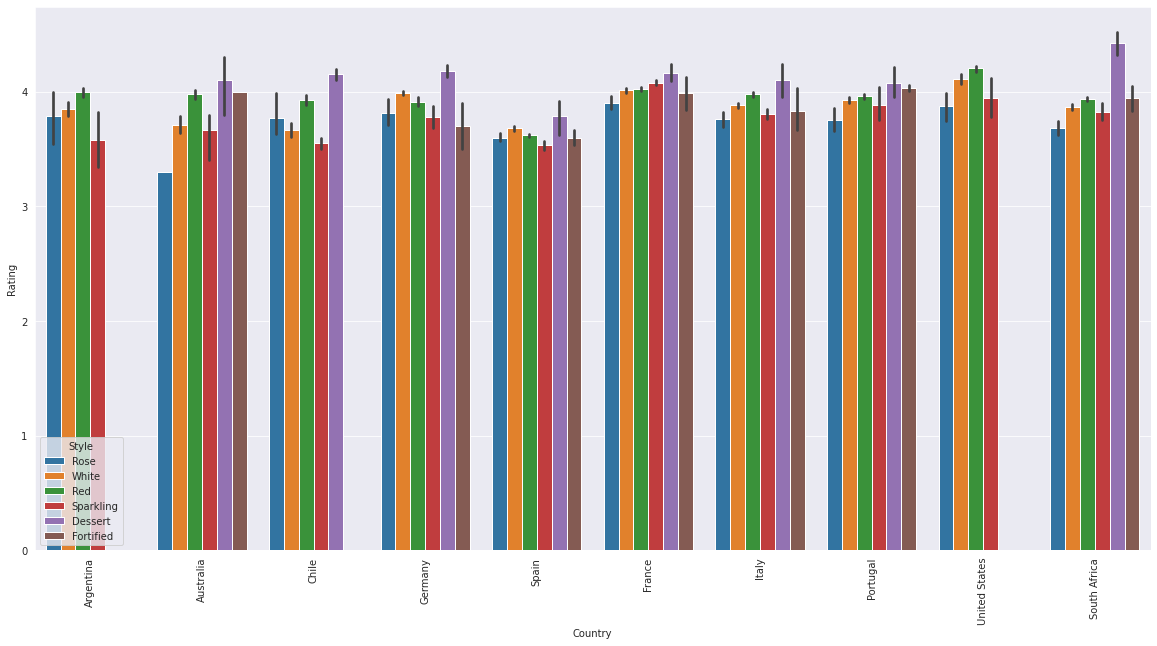

In [ ]:
def count_dataset(data):
    plt.figure(figsize=(20,10))
    sns.barplot(x="Country", y="Rating", hue="Style", data = data)
    plt.xticks(rotation=90)
    plt.show()


count_dataset(data)

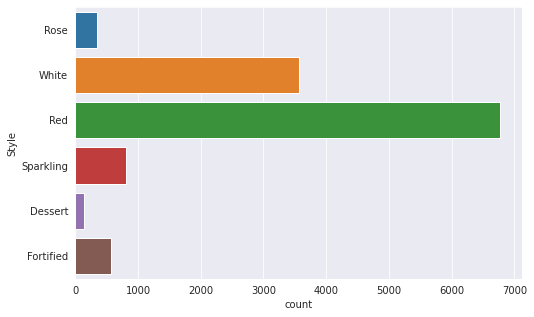

In [ ]:
def style_dataset(data):
    plt.figure(figsize=(8, 5))
    sns.countplot(y="Style", data=data);

style_dataset(data)

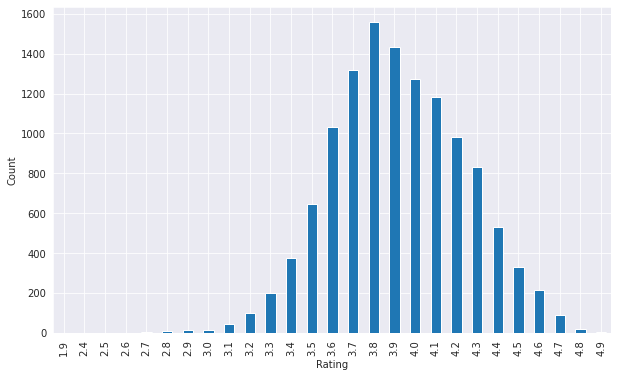

In [ ]:
def rating_dataset(data):
    plt.figure(figsize=(10, 6))
    plt.ylabel('Count')
    dd = data.groupby(['Rating'])['Wine'].count()
    dd.plot(kind='bar')

rating_dataset(data)


  

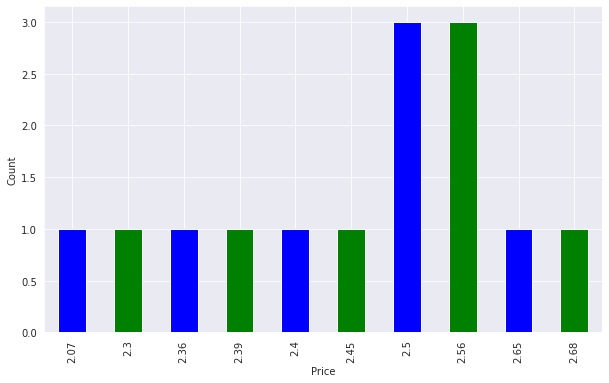

In [ ]:
def price_dataset(data):
    plt.figure(figsize=(10, 6))
    plt.ylabel('Count')
    top = data.groupby(['Price'])['Wine'].count().head(10)
    top.plot(kind='bar', color=['b', 'g'])

price_dataset(data)

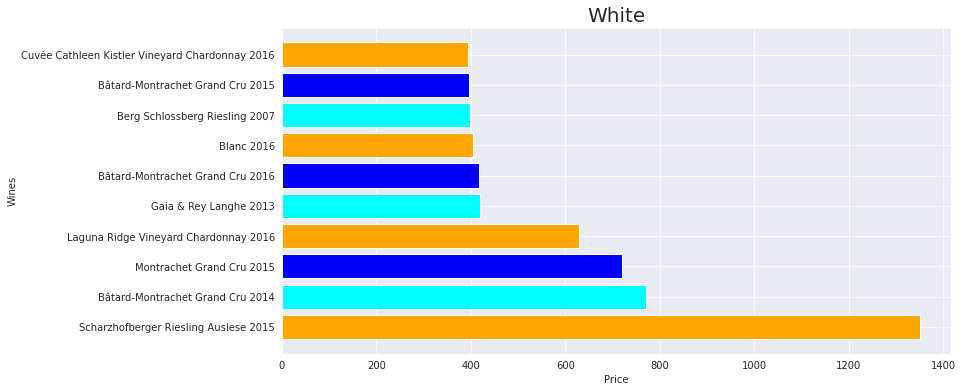

In [ ]:
def top_wine(dataset, style):
    c = ['orange', 'cyan', 'blue']
    most_reviews = dict(dataset.loc[(dataset['Style'] == style), ['Wine', 'Price']].nlargest(10, 'Price').values)
    vivi, price = list(most_reviews.keys()), list(most_reviews.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(vivi,price, color=c)
    plt.title(style, fontsize = 20)
    plt.ylabel('Wines')
    plt.xlabel('Price')
    plt.show()

top_wine(data,'White')

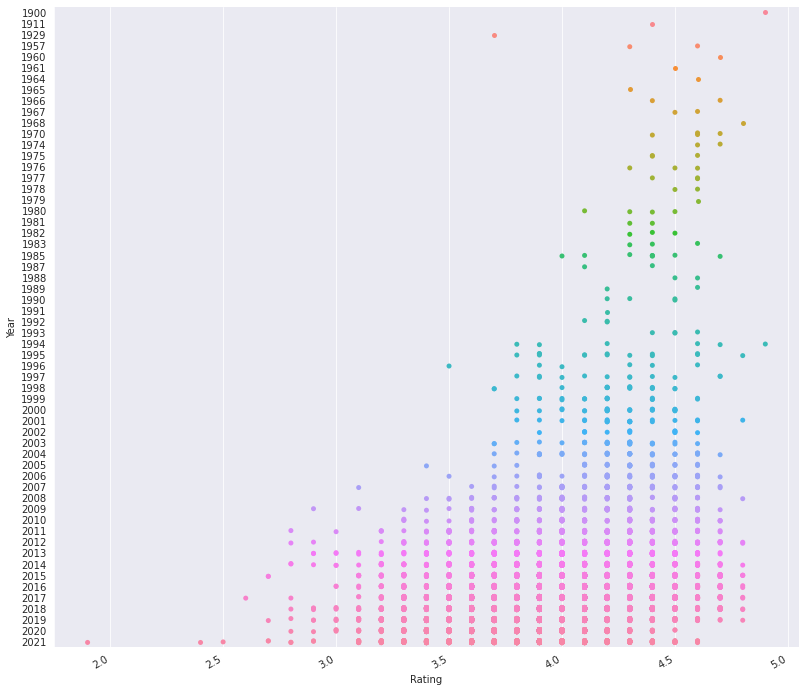

In [ ]:
def year_dataset(data):
    ax = sns.catplot(x='Rating', y='Year', data=data,orient="h",height=11.30)
    ax.fig.autofmt_xdate()
    plt.show()
    
year_dataset(data)

<Figure size 1440x720 with 0 Axes>

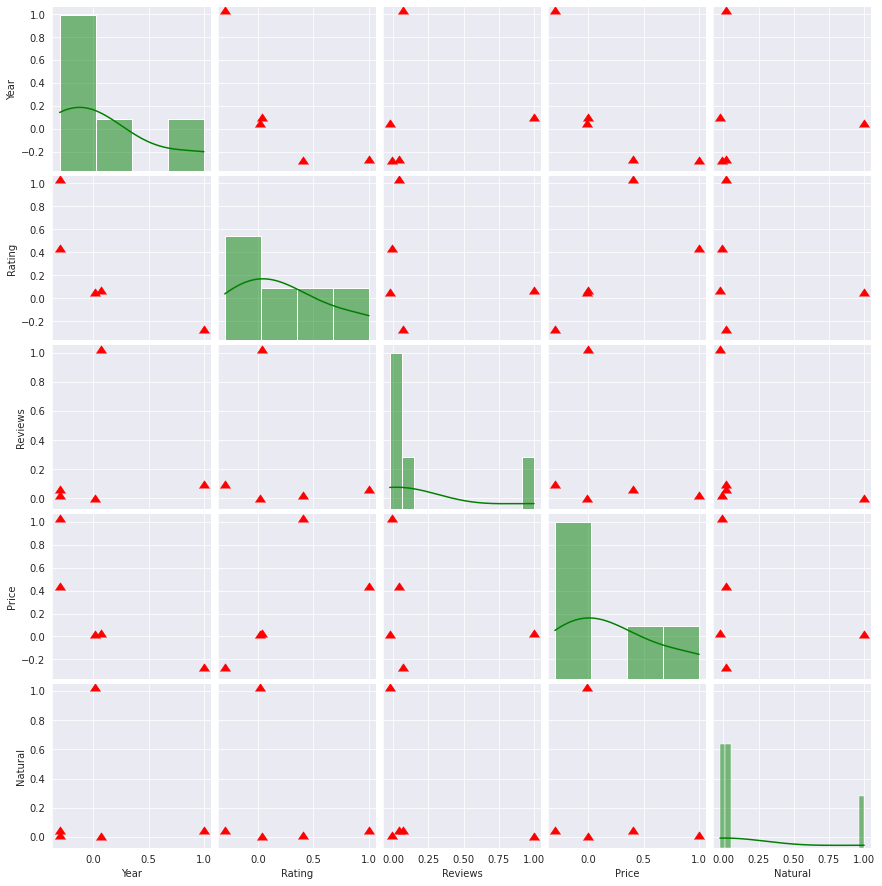

In [ ]:
def correlation(dataset):
    sns.set_style('darkgrid')
    correlations  = dataset.corr()
    plt.figure(figsize=(20,10))
    sns.pairplot(data=correlations, diag_kws=dict(color='green', kde=TabError), plot_kws=dict(color='red', marker=10, s=100))


correlation(data)

In [ ]:
data.head()

,Winery,Year,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style
0,Baron de Ley,2020,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose
1,New Age,2021,Sweet White N.V.,3.9,5672,7.43,Mendoza,Malbec,False,Argentina,White
2,Alamos,2018,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose
3,Alamos,2019,Torrontes 2019,3.8,820,8.00,Salta,Malbec,False,Argentina,White
4,Alamos,2020,Cabernet Sauvignon 2020,3.6,489,8.00,Mendoza,Malbec,False,Argentina,Red


In [ ]:
print('Categorical columns: ')
for col in data.columns:
    if data[col].dtype == 'object':
        print(str(col))
        label = preprocessing.LabelEncoder()
        label = label.fit(data[col])
        data[col] = label.transform(data[col].astype(str))

Categorical columns: 
Winery
Wine
Region
Primary_Grape
Country
Style


In [ ]:
data = (data-data.mean())/data.std()
data.head()

,Winery,Year,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style
0,-1.549758,0.662597,0.867093,0.868561,-0.195609,-0.305243,-0.251430,-0.976157,-0.203418,-2.299361,0.024925
1,0.583495,0.868929,1.188278,-0.062013,2.217003,-0.302833,-0.030256,-0.976157,-0.203418,-2.299361,1.410832
2,-1.748542,0.249932,0.091410,-0.062013,-0.049053,-0.297926,1.250885,-0.976157,-0.203418,-2.299361,0.024925
3,-1.748542,0.456264,1.357053,-0.372204,0.137785,-0.297926,0.804363,-0.976157,-0.203418,-2.299361,1.410832
4,-1.748542,0.662597,-1.235947,-0.992586,-0.004057,-0.297926,-0.030256,-0.976157,-0.203418,-2.299361,-0.668029


In [ ]:
def compute_correlations_matrix(dataset):
  correlations = dataset.corr()
  res = correlations["Price"].abs().sort_values(ascending=False)
  print(res)
  x = np.median(res)
  print(f"median is {x} ")
compute_correlations_matrix(data)

Price            1.000000
Rating           0.404361
Year             0.302767
Primary_Grape    0.104310
Style            0.088966
Country          0.037495
Region           0.024093
Natural          0.012113
Reviews          0.005186
Winery           0.003106
Wine             0.001974
Name: Price, dtype: float64
median is 0.03749496837572109 


In [ ]:
def vivino_fit_model_prediction(data):
    X = data[['Rating', 'Year','Style', 'Wine','Natural', 'Country']]
    y = data['Price']
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)
    # model = KNeighborsRegressor()
    # model = LinearRegression()
    # model = LinearSVR()
    model = LGBMRegressor(n_estimators=1000)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Model accuracy: {round(r2_score(y_test,y_pred)*100)}%")
vivino_fit_model_prediction(data)

Model accuracy: 52%
